In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!ls "/content/drive/My Drive/project"

dataset  model	streamlit


In [3]:
!ls "/content/drive/My Drive/project/dataset/Data/plant_image"

'Corn_(maize)___Common_rust_'   Potato___Early_blight   Tomato___Bacterial_spot


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize,  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical

In [5]:
# Plotting 16 images to check dataset
plt.figure(figsize=(12,12))
path = "/content/drive/My Drive/project/dataset/Data/plant_image/Potato___Early_blight"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

Output hidden; open in https://colab.research.google.com to view.

In [6]:
#Converting Images to array
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256,256))

            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [7]:
dir = "/content/drive/My Drive/project/dataset/Data/plant_image"
rootdir = listdir(dir)
imagelist, labellist = [], []
alllabels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']
binarylabels = [0,1,2]
temp = -1

# Reading and converting image to numpy array
for directory in rootdir:
  plantimagelist = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plantimagelist:
    imagepath = f"{dir}/{directory}/{files}"
    imagelist.append(convert_image_to_array(imagepath))
    labellist.append(binarylabels[temp])

In [8]:
labelcounts = pd.DataFrame(labellist).value_counts()
labelcounts.head()

0    300
1    300
2    300
Name: count, dtype: int64

In [9]:
imagelist[0].shape

(256, 256, 3)

In [10]:
labellist = np.array(labellist)
labellist.shape

(900,)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(imagelist, labellist, test_size=0.2, random_state = 10)

In [13]:
x_train = np.array(x_train, dtype=np.float16) / 255.0
x_test = np.array(x_test, dtype=np.float16) / 255.0
x_train = x_train.reshape( -1, 256,256,3)
x_test = x_test.reshape( -1, 256,256,3)

In [14]:
#one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train.shape)

(720, 3)


In [15]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 85, 85, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 42, 42, 16)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 28224)             0         
                                                                 
 flatten_1 (Flatten)         (None, 28224)             0

In [16]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

In [17]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [18]:
epochs = 10
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))

Epoch 1/10
5/5 [==============================] - 37s 7s/step - loss: 1.0984 - accuracy: 0.3003 - val_loss: 1.0978 - val_accuracy: 0.3611
Epoch 2/10
5/5 [==============================] - 34s 7s/step - loss: 1.0974 - accuracy: 0.4549 - val_loss: 1.0964 - val_accuracy: 0.6389
Epoch 3/10
5/5 [==============================] - 34s 7s/step - loss: 1.0958 - accuracy: 0.6528 - val_loss: 1.0948 - val_accuracy: 0.6528
Epoch 4/10
5/5 [==============================] - 32s 7s/step - loss: 1.0937 - accuracy: 0.6719 - val_loss: 1.0919 - val_accuracy: 0.6597
Epoch 5/10
5/5 [==============================] - 33s 7s/step - loss: 1.0907 - accuracy: 0.6545 - val_loss: 1.0889 - val_accuracy: 0.7847
Epoch 6/10
5/5 [==============================] - 33s 7s/step - loss: 1.0869 - accuracy: 0.8247 - val_loss: 1.0852 - val_accuracy: 0.8472
Epoch 7/10
5/5 [==============================] - 32s 7s/step - loss: 1.0826 - accuracy: 0.8403 - val_loss: 1.0802 - val_accuracy: 0.9167
Epoch 8/10
5/5 [==================

In [19]:
model.save("/content/drive/My Drive/project/model/plant_disease.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


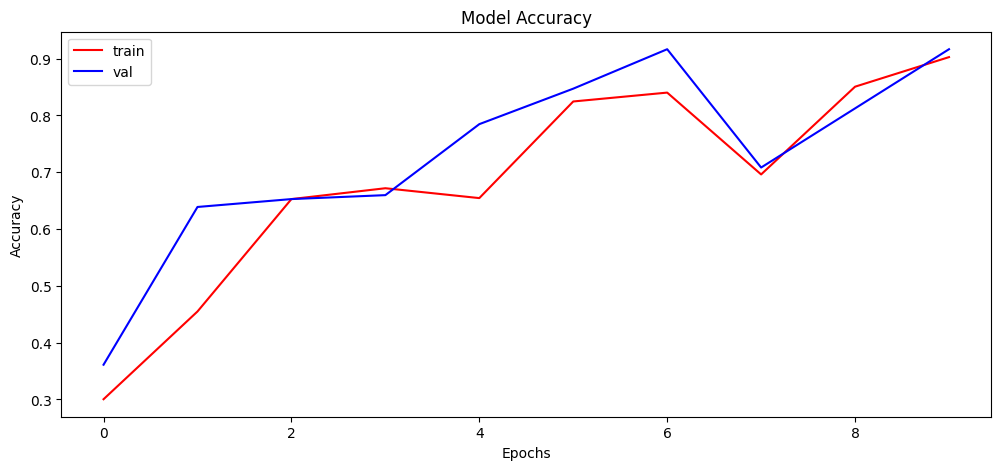

In [20]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [21]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
6/6 [==============================] - 3s 428ms/step - loss: 1.0599 - accuracy: 0.9333
Test Accuracy: 93.33333373069763


In [22]:
y_pred = model.predict(x_test)

6/6 [==============================] - 3s 437ms/step


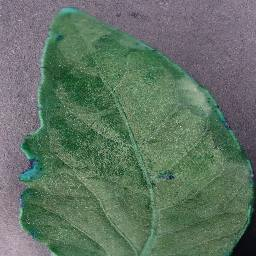

In [23]:
img = array_to_img(x_test[13])
img

In [24]:
print("Originally : ",alllabels[np.argmax(y_test[13])])
print("Predicted : ",alllabels[np.argmax(y_pred[13])])

Originally :  Tomato-Bacterial_spot
Predicted :  Potato-Early_blight


In [25]:
for i in range(10):
  print (alllabels[np.argmax(y_test[i])], "-" , alllabels[np.argmax(y_pred[i])])

Potato-Early_blight - Potato-Early_blight
Corn-Common_rust - Corn-Common_rust
Tomato-Bacterial_spot - Tomato-Bacterial_spot
Corn-Common_rust - Corn-Common_rust
Corn-Common_rust - Corn-Common_rust
Tomato-Bacterial_spot - Tomato-Bacterial_spot
Corn-Common_rust - Corn-Common_rust
Potato-Early_blight - Potato-Early_blight
Potato-Early_blight - Potato-Early_blight
Potato-Early_blight - Potato-Early_blight
